In [ ]:

import os
%pip install pandas
%pip install better-profanity
%pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/626.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.5 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('tweets.csv')
df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0


In [ ]:
!pip install plotly wordcloud matplotlib


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 861.5 kB/s eta 0:00:22
   - -------------------------------------- 0.8/19.1 MB 873.4 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/19.1 MB 866.0 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/19.1 MB 866.0 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/19.1 MB 866.0 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/19.1 MB 866.0 kB/s eta 0:00:21
   -- ------------------------------------- 1.3/19.1 MB 645.4 kB/s eta 0:00:28
   -- ------------------------------------- 1.3/19.1 MB 645.4 kB/s eta 0:00:28
   -- ------------------------------------- 1.3/19.1 MB 645.4 kB/s eta 0:00:28
   -- ---


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import re
import os
import pandas as pd
import numpy as np
from datetime import datetime

from better_profanity import profanity
from textblob import TextBlob


# Import Visualization Libraries
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import NLP Libraries
import nltk
from nltk.corpus import stopwords

# downloading stopwords
nltk.download('stopwords')

# Remove distarcting warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         tweets_data=os.path.join(dirname, filename)
#         print(os.path.join(dirname, filename))
df = pd.read_csv('tweets.csv')
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(3)

Data Shape is : (50001, 6)

Show Top 10 Records


,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0


In [ ]:
df.isna().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         1
Likes         2
Retweets      2
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
Likes         0
Retweets      0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49999 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   Date        49999 non-null  object 
 2   User        49999 non-null  object 
 3   Tweet       49999 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [ ]:

df.nunique()

Unnamed: 0    49999
Date          49820
User          35108
Tweet         49568
Likes           598
Retweets        312
dtype: int64

In [ ]:
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 2 numerical columns(features) : ['Likes', 'Retweets']

We have 4 categorical columns(features) : ['Unnamed: 0', 'Date', 'User', 'Tweet']


# Data Preprocessing


In [ ]:
data_dropped = df.drop(columns=['Date','User','Unnamed: 0'])
data_dropped.head()

,Tweet,Likes,Retweets
0,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,@annamalai_k @narendramodi A state level presi...,0.0,0.0


In [ ]:
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags but keep the text after the '#' sign
    tweet = re.sub(r'#', '', tweet)
    # Remove all punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Keep only word characters and whitespace
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Replace multiple spaces with a single space
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

data_dropped['cleaned_tweet'] = data_dropped['Tweet'].apply(clean_tweet)
data_dropped.head()

,Tweet,Likes,Retweets,cleaned_tweet
0,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0,respected indian citizens namaskaari am the or...
1,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0,respected indian citizens namaskaar i am the o...
2,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0,nmeet filmmaker prakash jha in new jersey talk...
3,@MrinalWahal Why would politicians stop using ...,0.0,0.0,why would politicians stop using religion in p...
4,@annamalai_k @narendramodi A state level presi...,0.0,0.0,a state level president knows the policy of th...


In [ ]:
data_dropped = data_dropped.drop(columns=['Tweet'])
data_dropped.head()

,Likes,Retweets,cleaned_tweet
0,0.0,0.0,respected indian citizens namaskaari am the or...
1,0.0,0.0,respected indian citizens namaskaar i am the o...
2,0.0,0.0,nmeet filmmaker prakash jha in new jersey talk...
3,0.0,0.0,why would politicians stop using religion in p...
4,0.0,0.0,a state level president knows the policy of th...


In [ ]:
data_dropped.rename(columns={'cleaned_tweet':'Tweets'},inplace=True)

In [ ]:
import pandas as pd
import re
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence

ModuleNotFoundError: No module named 'torch'

In [ ]:


# Tokenizer
tokenizer = get_tokenizer('basic_english')

# Tokenization
data_dropped['tokenized'] =data_dropped ['Tweets'].apply(tokenizer)

# Build vocabulary
vocab = build_vocab_from_iterator(data_dropped['tokenized'], specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])
data_dropped.head()

,Likes,Retweets,Tweets,tokenized
0,0.0,0.0,respected indian citizens namaskaari am the or...,"[respected, indian, citizens, namaskaari, am, ..."
1,0.0,0.0,respected indian citizens namaskaar i am the o...,"[respected, indian, citizens, namaskaar, i, am..."
2,0.0,0.0,nmeet filmmaker prakash jha in new jersey talk...,"[nmeet, filmmaker, prakash, jha, in, new, jers..."
3,0.0,0.0,why would politicians stop using religion in p...,"[why, would, politicians, stop, using, religio..."
4,0.0,0.0,a state level president knows the policy of th...,"[a, state, level, president, knows, the, polic..."


In [ ]:
!pip install vaderSentiment


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(tweet):
    # Get the polarity score using VADER
    sentiment_score = analyzer.polarity_scores(tweet)['compound']

    # Classify sentiment based on compound score
    if sentiment_score > 0:
        return '1'
    elif sentiment_score < 0:
        return '-1'
    else:
        return '0'

# Apply the function to the 'Tweets' column to label sentiments
data_dropped['sentiment'] = data_dropped['Tweets'].apply(lambda x: get_sentiment(x))

# Display the cleaned tweets, tokenized tweets, and sentiment
data_dropped.head()


,Tweets,sentiment
0,respected indian citizens namaskaari am the or...,1
1,respected indian citizens namaskaar i am the o...,1
2,nmeet filmmaker prakash jha in new jersey talk...,0
3,why would politicians stop using religion in p...,-1
4,a state level president knows the policy of th...,1


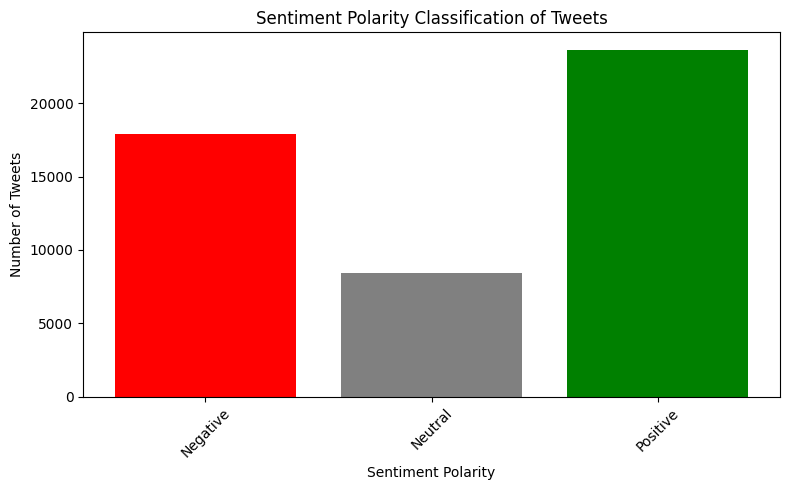

                                              Tweets sentiment
0  respected indian citizens namaskaari am the or...         1
1  respected indian citizens namaskaar i am the o...         1
2  nmeet filmmaker prakash jha in new jersey talk...         0
3  why would politicians stop using religion in p...        -1
4  a state level president knows the policy of th...         1


In [ ]:
sentiment_counts = data_dropped['sentiment'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
sentiment_labels = ['Negative', 'Neutral', 'Positive']
plt.bar(sentiment_labels, sentiment_counts, color=['red', 'gray', 'green'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Polarity Classification of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the DataFrame to check results
print(data_dropped[['Tweets', 'sentiment']].head())

In [ ]:
data_dropped.to_csv('final_tweets_1.csv',index=False)

In [ ]:
data_dropped.head()

,Tweets,sentiment
0,respected indian citizens namaskaari am the or...,Positive
1,respected indian citizens namaskaar i am the o...,Positive
2,nmeet filmmaker prakash jha in new jersey talk...,Neutral
3,why would politicians stop using religion in p...,Negative
4,a state level president knows the policy of th...,Positive
